# вещественные

In [ ]:
# Пропущенные переменные в вещественных признаках
num_cols = df.select_dtypes(exclude='object').columns # Это получение числовые (необъектные) имен этих столбцов в виде Index-объекта.
df[num_cols].isna().sum() # сумма isna по столбикам выше

просто заполенение медианой

In [ ]:
# Заполним медианой
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# КАТЕГОРИАЛЬНЫЕ

In [ ]:
df.describe(include='object') #Метод .describe() вычисляет основные статистики по данным.

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900



count	Количество непустых значений     
unique	Количество уникальных значений      
top	Самое частое значение       
freq	Частота самого частого значения      

Пропуски в категориальных заполним самым популярным значением

In [ ]:
# Пропуски в категориальных заполним самым популярным значением
df = df.fillna(df.mode().iloc[0])
df.isna().sum()

Как это работает          
df.mode() — вычисляет моду (самое частое значение) для каждого столбца.             
.iloc[0] — берет первую моду (если есть несколько одинаково частых значений).            
df.fillna(...) — заполняет все NaN этим значением.               

# константные признаки

In [ ]:
#константные признаки

for i in df.columns:
    
    if (df[i] == df[i][0]).all():
        df.drop(columns=[i], inplace=True)

# OHE

In [ ]:
df = pd.get_dummies(df, drop_first=True) #Этот метод преобразует категориальные переменные в бинарные 

# корреляция

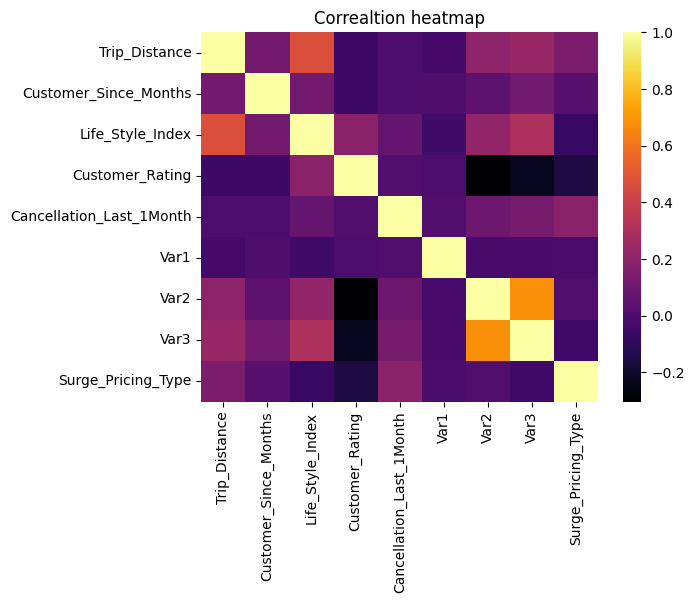

In [ ]:
plt.title("Correaltion heatmap")
sns.heatmap(df[num_cols].corr(), cmap='inferno');

табличка кореляций по возрастанию

In [ ]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(df[num_cols])


Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468332
Life_Style_Index  Var3                0.303324
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64

# СОЗДАЕМ X Y